In [6]:
import csv
import random
from datetime import datetime, timedelta

num_records = 100
categories = ["Электроника", "Одежда", "Книги", "Игрушки", "Продукты"]
products = {
    "Электроника": ["Смартфон", "Ноутбук", "Телевизор", "Наушники"],
    "Одежда": ["Футболка", "Джинсы", "Куртка", "Шляпа"],
    "Книги": ["Роман", "Учебник", "Комикс", "Словарь"],
    "Игрушки": ["Кубик Рубика", "Кукла", "Мяч", "Конструктор"],
    "Продукты": ["Яблоки", "Молоко", "Хлеб", "Шоколад"]
}

def random_date():
    start_date = datetime.now() - timedelta(days=365)
    random_number_of_days = random.randint(0, 365)
    random_date = start_date + timedelta(days=random_number_of_days)
    return random_date.strftime("%Y-%m-%d")

with open('sales.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["номер заказа", "дата заказа", "название товара", "категория товара", "количество продаж", "цена за единицу", "общая стоимость"])
    
    for i in range(1, num_records + 1):
        category = random.choice(categories)
        product = random.choice(products[category])
        quantity = random.randint(1, 20)
        unit_price = round(random.uniform(5.0, 1000.0), 2)
        total_price = round(quantity * unit_price, 2)
        
        writer.writerow([i, random_date(), product, category, quantity, unit_price, total_price])


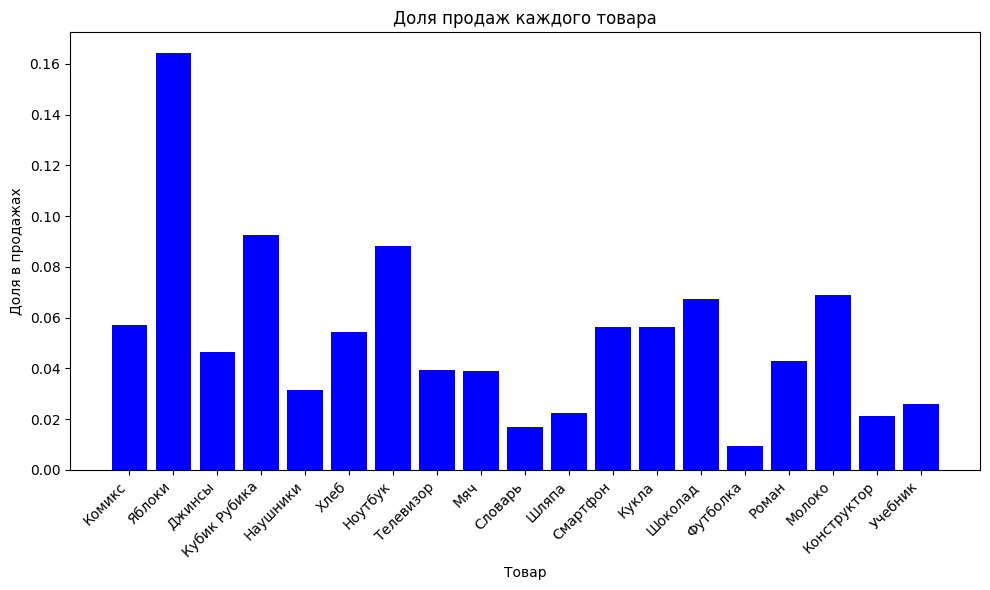

Общая сумма продаж: 498694.4699999999
Больше всего продан товар: Яблоки (121 шт)
Товар с наибольшей выручкой: Яблоки (81864.3)
Детали по каждому товару:
Комикс: 57 шт, доля: 5.70%
Яблоки: 121 шт, доля: 16.42%
Джинсы: 54 шт, доля: 4.65%
Кубик Рубика: 77 шт, доля: 9.26%
Наушники: 33 шт, доля: 3.15%
Хлеб: 85 шт, доля: 5.42%
Ноутбук: 92 шт, доля: 8.84%
Телевизор: 55 шт, доля: 3.92%
Мяч: 28 шт, доля: 3.89%
Словарь: 12 шт, доля: 1.70%
Шляпа: 51 шт, доля: 2.25%
Смартфон: 42 шт, доля: 5.64%
Кукла: 44 шт, доля: 5.64%
Шоколад: 46 шт, доля: 6.72%
Футболка: 15 шт, доля: 0.92%
Роман: 57 шт, доля: 4.27%
Молоко: 43 шт, доля: 6.91%
Конструктор: 25 шт, доля: 2.13%
Учебник: 28 шт, доля: 2.58%


In [8]:
import csv
import random
from collections import defaultdict
import matplotlib.pyplot as plt

def qsort(arr):
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)
    return qsort([x for x in arr if x < pivot]) + [pivot] * arr.count(pivot) + qsort([x for x in arr if x > pivot])

def make_report(data):
    total = sum(row['Стоимость'] for row in data)
    best_selling, best_count = max(((product, sum(row['Продано'] for row in data if row['Товар'] == product)) for product in {row['Товар'] for row in data}), key=lambda x: x[1])
    top_revenue, top_rev_value = max(((product, sum(row['Стоимость'] for row in data if row['Товар'] == product)) for product in {row['Товар'] for row in data}), key=lambda x: x[1])

    report = f"Общая сумма продаж: {total}\nБольше всего продан товар: {best_selling} ({best_count} шт)\nТовар с наибольшей выручкой: {top_revenue} ({top_rev_value})\n"

    sales_share = defaultdict(int)
    for row in data:
        sales_share[row['Товар']] += row['Стоимость']
    shares = [sales_share[product] / total for product in sales_share.keys()]

    plt.figure(figsize=(10, 6))
    plt.bar(sales_share.keys(), shares, color='blue')
    plt.xlabel('Товар')
    plt.ylabel('Доля в продажах')
    plt.title('Доля продаж каждого товара')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    report += "Детали по каждому товару:\n"
    for product, revenue in sales_share.items():
        count = sum(row['Продано'] for row in data if row['Товар'] == product)
        report += f"{product}: {count} шт, доля: {revenue/total:.2%}\n"

    return report

def load_data(filepath):
    with open(filepath, newline='', encoding='utf-8') as f:
        reader = csv.reader(f, delimiter=',')
        
        return [{'Номер': int(row[0]), 'Дата': row[1], 'Товар': row[2], 'Категория': row[3], 'Продано': int(row[4]), 'Цена': float(row[5]), 'Стоимость': float(row[6])} for idx, row in enumerate(reader) if idx != 0]

def main(filepath):
    print(make_report(load_data(filepath)))

main('sales.csv')